In [1]:
%matplotlib inline

#### Credits for code, data and documentation : https://python4astronomers.github.io/astropy-UVES/UVES.html

**Target object:** MN Lup, a T Tauri star

**Aim**: To study this MN Lup star and decipher its accretion disk status.

**Reading materials:**

1. For basic spectral lines in stars : http://www.astronomynotes.com/starprop/s12.htm

2. T Tauri Star: https://en.wikipedia.org/wiki/T_Tauri_star.
    + By now, we understand that Calcium lines in the spectra will be the dominant ones for T Tauri stars.
    + Wavelength range: 8000 Kelvin corresponds to 360nm, 3000 Kelvin corresponds to 960nm.
    + UVES spectrograph specs: http://www.eso.org/sci/facilities/paranal/instruments/uves/inst.html
    
3. Doppler shift and Emission line spectra : http://spiff.rit.edu/classes/phys301/lectures/doppler/doppler.html

    Notations used are: 

    + [Element I] is equivalent to Neutral Element
    + [Element II] is equivalent to Element<sup>+1</sup>

    So, we will look for Ca<sup>+</sup> i.e [Ca II] line in the spectra, to decipher the motion. (Prominent among these are the H-line at 3968.5 Å and the K line at 3933.7 Å of singly ionized calcium, or Ca II. In the Sun or other stars with low temperatures, the prominence of the H and K lines in the visible spectra can be an indication)

4. Read the abstract : http://esoads.eso.org/cgi-bin/nph-bib_query?bibcode=2005A%26A...440.1105S&db_key=AST (If interested, full paper: http://www.aanda.org/articles/aa/pdf/2005/36/aa2901-05.pdf , though not required for this session)

Note: Markdown cheatsheet : https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

### We will cover the analysis in four sections:
### Section 1. Read data from fits files and save the flux Vs wavelength details.
### Section 2. Fit curve near the emission lines and save the flux data.
### Section 3. Find red/blue shift i.e. vsini, plot and look for any changes/pattern.
### Section 4. Calculate changes in flux across the observation period and conclude.

Now, let us start with..
### Section 1. Read data from fits files and save the flux Vs wavelength details.

In [2]:
from glob import glob
# glob searches through directories similar to the Unix shell
filelist = glob('data/*.fits')
# sort alphabetically - given the way the filenames are. this also sorts in time
filelist.sort()

In [3]:
from astropy.wcs import WCS
from astropy.io import fits

# Read the first fits file in the list and check what is in there:
fits_handler = fits.open(filelist[0])
fits_handler.info()

Filename: data/r.UVES.2011-08-11T232352.266-A01_0000.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU     611   (42751,)   float32   


This is how the fits file are. Next, we need to extract data from this file. So, we should know, how many axes are there, what coordinates are used etc. These details will be in the header.

In [4]:
header = fits_handler[0].header
print(header)

SIMPLE  =                    T          / file does conform to FITS standard    BITPIX  =                  -32          / number of bits per data pixel         NAXIS   =                    1          / number of data axes                   NAXIS1  =                42751          / length of data axis 1                 EXTEND  =                    T          / FITS dataset may contain extensions   DATE    = '2011-08-11T23:44:46'         / file creation date (YYYY-MM-DDThh:mm:sCTYPE1  = 'WAVELENGTH [Ang]'            / Auto Added Keyword                    BUNIT   = 'ADU     '                    / Auto Added Keyword                    CRVAL1  =     3732.05623191818          / Auto Added Keyword                    CRPIX1  =                   1.          / Auto Added Keyword                    CDELT1  =   0.0296533834852385          / Auto Added Keyword                    ORIGIN  = 'ESO     '                    / European Southern Observatory.        TELESCOP= 'ESO-VLT-U2'                  

That is our header information. We have a nice function in astropy package to extract these details in just one line of instruction. For more details : http://docs.astropy.org/en/stable/wcs/

In [5]:
# this 'WCS' function extracts and gies us the necessary details in a neat fashion :P
wcs = WCS(header)
print(wcs)

WCS Keywords

Number of WCS axes: 1
CTYPE : 'WAVELENGTH [Ang]'  
CRVAL : 3732.0562319181799  
CRPIX : 1.0  
PC1_1  : 1.0  
CDELT : 0.029653383485238501  
NAXIS : 42751  0


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [6]:
import numpy as np
index = np.arange(header['NAXIS1'])
print(header['NAXIS1']) # gives length of array, in first axis (size: 42751)
print(index.shape) # 0,1,,... 42750
print(index[:,np.newaxis].shape) # increase dimension by 1

42751
(42751,)
(42751, 1)


In [7]:
wavelength = wcs.wcs_pix2world(index[:,np.newaxis], 0)
wavelength = wavelength.flatten() # reduces a dimension, by folding the rows
print(wavelength) 
# this gives us the wavelengths where the measurements have been made. in Angstroms
# Remember we are looking for Calcium [Ca II] lines

[ 3732.05623192  3732.0858853   3732.11553869 ...,  4999.67906915
  4999.70872253  4999.73837591]


[ 0.  0.  0. ...,  0.  0.  0.]


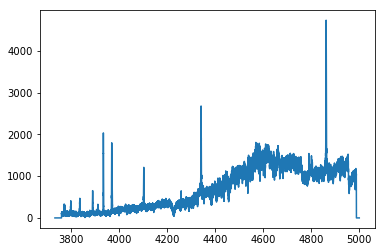

In [8]:
flux = fits_handler[0].data
print(flux)
import matplotlib.pyplot as plt
plt.plot(wavelength,flux) # x axis: wavelength, y axis: flux
plt.show()
# the spikes show the presence of strong emission lines corresponding to those wavelengths.
# look for our [Ca II] lines : at 3968.5 Å and 3933.7 Å . Hope you were able to spot it.
# Note that these two lines are separated by just 35 Å. that is why we need such good spectral resolution.

After zooming in the plot, you can see these two lines of [Ca II] present.

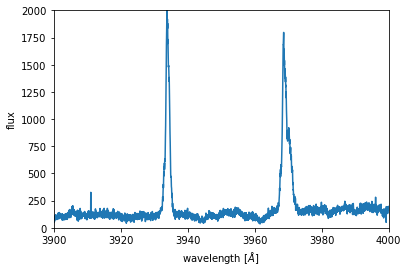

In [9]:
# these lines will save the zoomed in plot to local drive.
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(wavelength, flux)
ax.set_xlim([3900, 4000])
ax.set_ylim([0,2000])
ax.set_xlabel('wavelength [$\AA$]')
ax.set_ylabel('flux')
fig.savefig('CaII.png')

In [10]:
w1=wavelength[0:len(wavelength)-1]
w2=wavelength[1:len(wavelength)]
spectral_resolution=w2-w1

print(spectral_resolution)  
# this gives the split between two adjacet wavelengths that can be measured. 
# think of it like viewing fine lines (high spec resol.), or like blurred lines (low spec resol.)

[ 0.02965338  0.02965338  0.02965338 ...,  0.02965338  0.02965338
  0.02965338]


Our UVES has spectral resolution of about 0.02965 Å.
Thus, we know how to extract the flux plot from one fits image. 

#### Now, we go back to our problem statement. If there was accretion happening on the stellar surface, it will cause rotation of the disk, right? this will lead to rotation modulated features in emission lines. How do we find that? 

#### By, observing the flux over a period of time. For this, we will see the pattern of flux plot (as we plotted a couple of minutes back) over few days of observation.

As will have to repeat this process for fits images taken during observations on different dates, we will condense the above codes into a single function: 'flux_from_single_fits_file'

In [11]:
def flux_from_single_fits_file(fits_file):
        fits_handler = fits.open(fits_file)
        header = fits_handler[0].header
        wcs = WCS(header)
        index = np.arange(header['NAXIS1'])
        wavelength_in_function = wcs.wcs_pix2world(index[:,np.newaxis], 0)
        wavelength_in_function = wavelength_in_function.flatten()
        flux = fits_handler[0].data
        date_of_observation = header['Date-OBS']
        return wavelength_in_function, flux, date_of_observation

In [12]:
#create dummy lists for the flux and observation-date
flux = np.zeros((len(filelist), len(wavelength)))
date = np.zeros((len(filelist)), dtype = 'S23')

# fill the dummy lists with values extracted from the fits files. 
# Use the above mentioned steps in 'flux_from_single_fits_file' function.
for i, fname in enumerate(filelist):
        w, f, date_obs = flux_from_single_fits_file(fname)
        flux[i,:] = f
        date[i] = date_obs
print(date)
print(flux)
print(date.shape)

['2011-08-11T23:23:52.266' '2011-08-11T23:45:21.856'
 '2011-08-12T00:06:51.936' '2011-08-12T00:28:05.585'
 '2011-08-12T00:49:55.136' '2011-08-12T01:11:13.045'
 '2011-08-12T01:32:43.455' '2011-08-12T01:53:53.213'
 '2011-08-12T02:15:03.172' '2011-08-12T02:36:31.871'
 '2011-08-12T02:57:42.000' '2011-08-12T03:19:11.790'
 '2011-08-12T03:40:21.358' '2011-08-12T23:20:00.665'
 '2011-08-12T23:42:59.017' '2011-08-13T00:04:34.253'
 '2011-08-13T00:40:52.406' '2011-08-13T01:04:02.610'
 '2011-08-13T01:25:12.345' '2011-08-13T01:46:42.001'
 '2011-08-13T02:07:56.237' '2011-08-13T02:29:06.331'
 '2011-08-13T02:50:35.998' '2011-08-13T03:11:49.083'
 '2011-08-13T03:32:58.637']
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
(25,)


Now, we have the flux of all the 25 fits files. Let us plot the flux of some five of the flux, overlapping.

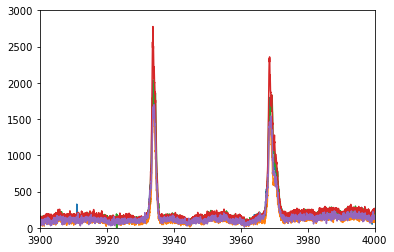

In [13]:
# plotf of flux during 5 different observations
plt.plot(wavelength,flux[0,:]) # x axis: wavelength, y axis: flux
plt.plot(wavelength,flux[4,:]) # x axis: wavelength, y axis: flux
plt.plot(wavelength,flux[14,:]) # x axis: wavelength, y axis: flux
plt.plot(wavelength,flux[19,:]) # x axis: wavelength, y axis: flux
plt.plot(wavelength,flux[24,:]) # x axis: wavelength, y axis: flux
plt.xlim(3900,4000)
plt.ylim(0,3000)
#ax.set_xlim([-3,+3]) # this trims the horizontal scale to just +-3

plt.show()
# the plot shows five flux plots overlapped.

wavelength_dimensionless=wavelength # save it in some variable. can use it later.

Now, we have flux plots for all 25 fits files. 

We have finished ** Section 1. Read data from fits files and save the flux Vs wavelength details.** .

Next, we move to :
### Section 2. Fit curve near the emission lines and save the flux data.

In [14]:
import astropy.units as u
from astropy.constants.si import c

# more about constants and units in next section.
wavelength_with_dim = wavelength_dimensionless * u.AA # adds units of Angstrom to wavelength
heliocentric = -23. * u.km/u.s # details mentioned in 'constants' section.

wavelength_with_dim = wavelength_with_dim * (1. * u.dimensionless_unscaled+ heliocentric/c)
print(wavelength_with_dim)

[ 3731.76990953  3731.79956064  3731.82921174 ...,  4999.29549506
  4999.32514617  4999.35479727] Angstrom


In [15]:
cont=[[3925*u.AA, 3930*u.AA],[3938*u.AA, 3945*u.AA]]
print(cont)
print(cont[0][1])
# [Ca II] 3968.5 Å and 3933.7 Å 

[[<Quantity 3925.0 Angstrom>, <Quantity 3930.0 Angstrom>], [<Quantity 3938.0 Angstrom>, <Quantity 3945.0 Angstrom>]]
3930.0 Angstrom


In [16]:
def region_around_line(w, flux, cont):
        '''cut out and normalize flux around a line
        Parameters
        ----------
        w : 1 dim np.ndarray array of wanvelenghts
        flux : np.ndarray of shape (N, len(w)) array of flux values for different spectra in the series
        cont : list of lists wavelengths for continuum normalization [[low1,up1],[low2, up2]]
            that described two areas on both sides of the line
        '''
        print(w)
        #index is true in the region where we fit the polynomial
        indcont = ((w > cont[0][0]) & (w < cont[0][1])) |((w > cont[1][0]) & (w < cont[1][1]))
        #index of the region we want to return
        indrange = (w > cont[0][0]) & (w < cont[1][1])
        print(indrange.sum())
        # make a flux array of shape
        # (nuber of spectra, number of pointsin indrange)
        print(flux.shape)
        f = np.zeros((flux.shape[0], indrange.sum()))
        print(f.shape)
        for i in range(flux.shape[0]):
            # fit polynomial of second order to the continuum region
            # syntax: numpy.polyfit(x, y, order), for y=f(x).
            x_for_curvefit=w[indcont] # for each wavelength in the region
            y_for_curvefit=flux[i,indcont] # for corresponding flux, for that particular wavelength
            linecoeff = np.polyfit(x_for_curvefit,y_for_curvefit,2)            
        
            # to normalize, we need a reference value. So, set the curve part before the first peak as reference.
            # we do this, by dividing the output with the predicted value.
            f[i,:] = flux[i,indrange]/np.polyval(linecoeff, w[indrange])
            
        # let us print just one set to understand how they work:
        print(linecoeff) 
        # print(np.polyval(linecoeff, w[indrange]))
        l=flux[0,indrange]/np.polyval(linecoeff, w[indrange])
        print(l.shape)
        print(f[0,0])
        
        return w[indrange], f

In [17]:
wcaII, fcaII = region_around_line(wavelength_with_dim, flux,cont)
print('returned from function')
#print(wcaII,fcaII)
print(wcaII.shape)
print(fcaII.shape)

[ 3731.76990953  3731.79956064  3731.82921174 ...,  4999.29549506
  4999.32514617  4999.35479727] Angstrom
675
(25, 42751)
(25, 675)
[ -5.06585902e-01   3.98609937e+03  -7.84109031e+06]
(675,)
1.12548116327
returned from function
(675,)
(25, 675)


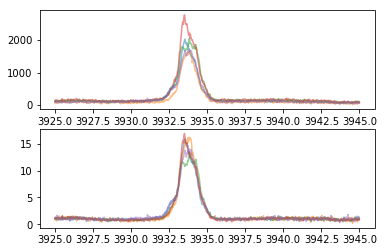

In [18]:
# let us plot some of the curve-fit flux patterns:
indrange = (wavelength_with_dim > cont[0][0]) & (wavelength_with_dim < cont[1][1])
# regular plot
ax1=plt.subplot(211)
plt.plot(wcaII,flux[0,indrange],alpha=0.5)
plt.plot(wcaII,flux[4,indrange],alpha=0.5)
plt.plot(wcaII,flux[14,indrange],alpha=0.5)
plt.plot(wcaII,flux[19,indrange],alpha=0.5)
plt.plot(wcaII,flux[24,indrange],alpha=0.5)
# plot of curve-fit flux patterns
ax2=plt.subplot(212)
plt.plot(wcaII,fcaII[0,:],alpha=0.5)
plt.plot(wcaII,fcaII[4,:],alpha=0.5)
plt.plot(wcaII,fcaII[14,:],alpha=0.5)
plt.plot(wcaII,fcaII[19,:],alpha=0.5)
plt.plot(wcaII,fcaII[24,:],alpha=0.5)
plt.show()

So far we have calculated the flux of Ca II lines within the required wavelength limits (curve fit has given smoother curve than the unfit one). this gives us the emission line profiles.

With that we come to the end of ** Section 2. Fit curve near the emission lines and save the flux data.**

Next, let us see
### Section 3. Find red/blue shift i.e. vsini, plot and look for any changes/pattern.
Next, we will see how to find motion i.e. doppler effect in the emission line profiles that we just got:

In [19]:
# To recap,
# this eliminates the need for multiplying with powers of ten, and units get nullified easily, eay conversion to other scales
# for ex: to convert AU to m: just use:

dist=1*u.AU
print(dist) # in AU
print(dist.to(u.m)) # in metre
print(dist.to(u.pc)) # in parsecs

1.0 AU
1.495978707e+11 m
4.84813681113e-06 pc


In [20]:
# we will define some more constants and units:

from astropy.constants.si import G, M_sun, R_sun

# these constants were taken from the paper: 
# heliocentric = -23. * u.km/u.s  # page 2/14
radial_velocity = -4.77 * u.km / u.s  # page: 5/14
R_MN_Lup = 0.9 * R_sun      # page: 8/14
M_MN_Lup = 0.6 * M_sun      # page: 7/14 table
vsini_MN_Lup = 74.6 * u.km / u.s   # page: 7/14 table
period_of_star = 0.439 * u.day      # page: 7/14 table
inclination = 45. * u.degree # page: 7/14 table

incl = inclination.to(u.radian)

In [21]:
from astropy.time import Time
# get dates of observation from the 25 fits files.
obs_times = Time(date, scale = 'utc')
# other 24 observing times, wrt the first observation. units: days:
delta_t = obs_times - Time(date[0], scale = 'utc')
# period_of_star has units of earth days. 
# delta_p : overall observational period, as on star's cycle
delta_p = delta_t.value * u.day / period_of_star
print(obs_times)
print(delta_t)
print(delta_p)

['2011-08-11T23:23:52.266' '2011-08-11T23:45:21.856'
 '2011-08-12T00:06:51.936' '2011-08-12T00:28:05.585'
 '2011-08-12T00:49:55.136' '2011-08-12T01:11:13.045'
 '2011-08-12T01:32:43.455' '2011-08-12T01:53:53.213'
 '2011-08-12T02:15:03.172' '2011-08-12T02:36:31.871'
 '2011-08-12T02:57:42.000' '2011-08-12T03:19:11.790'
 '2011-08-12T03:40:21.358' '2011-08-12T23:20:00.665'
 '2011-08-12T23:42:59.017' '2011-08-13T00:04:34.253'
 '2011-08-13T00:40:52.406' '2011-08-13T01:04:02.610'
 '2011-08-13T01:25:12.345' '2011-08-13T01:46:42.001'
 '2011-08-13T02:07:56.237' '2011-08-13T02:29:06.331'
 '2011-08-13T02:50:35.998' '2011-08-13T03:11:49.083'
 '2011-08-13T03:32:58.637']
[ 0.          0.01492581  0.02985729  0.0445986   0.05975544  0.07454605
  0.08948135  0.10417763  0.11887623  0.13379172  0.14849229  0.16342042
  0.17811449  0.99731943  1.01327258  1.02826374  1.05347384  1.06956417
  1.08426017  1.09918675  1.11393485  1.12863501  1.14356171  1.15829649
  1.17299041]
[ 0.          0.03399957  0.06

(For any basics on vsini: https://en.wikipedia.org/wiki/Stellar_rotation

In [22]:
# function 'w2vsini' takes a wavelength array and the rest wavelength of a spectral line as input, 
# turns it into a Doppler shift, subtracts the radial velocity of MN Lup (4.77 km/s)
# and expresses the resulting velocity in units of vsini. 
# We need this function to show the red- and blueshift of the spectrum relative to the Ca II H line. 

def w2vsini(WL_meas,WL_ref, radial_velocity,vsini_MN_Lup):
    doppler = ((WL_meas-WL_ref)/WL_ref * c)
    velocity = doppler + radial_velocity
    return (velocity / vsini_MN_Lup)#-------------------------------------------------------------------------------------
    
wcaII_reference=393.366 * u.nm    
vsini = w2vsini(wcaII,wcaII_reference, radial_velocity,vsini_MN_Lup).decompose() # 3933 angstrom is the CaII line.
# decompose : gives the reduced units. like : km/m converted to 1000 m etc..
#print(x)
print(vsini[0])

-8.90476484803


**Note:**
If you get 'UnitConversionError:Can only apply 'greater' function to quantities with compatible dimensions', it means the dimension of wavelength, doesnot match with that of 'cont'. Maybe you executed the code multiple times , each time adding another dimension to it, (while multiplying with units.). To fix it, run the whole code once from scratch.

x-axis to show the Doppler shift expressed in units of the rotational velocity. 

In this way, features that are rotationally modulated will stick out between -1 and +1:

We start with plotting the Spectra with lineshift (i.e. vsini Vs Flux) for the [Ca II] lines

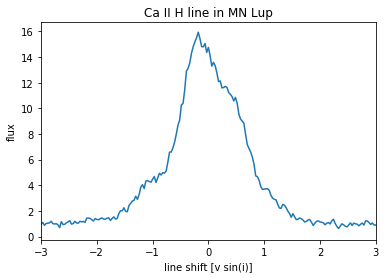

(675,)
(675,)


In [23]:
##    Single Plot:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(vsini, fcaII[0,:])
ax.set_xlim([-3,+3]) # this trims the horizontal scale to just +-3
ax.set_xlabel('line shift [v sin(i)]')
ax.set_ylabel('flux')
ax.set_title('Ca II H line in MN Lup')
plt.draw()
plt.show()
fig.savefig('CaII-lines-one.png')
print(vsini.shape)
print(fcaII[0,:].shape)

Next, let us plot all the 25 flux curves with a little vertical shift (to enable viewing)

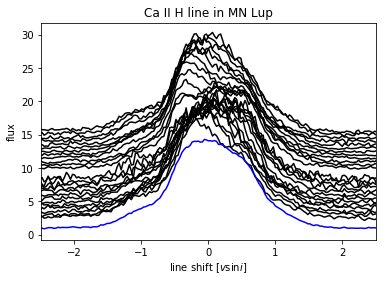

In [24]:
# multiple lines,overlapped, with little vertical shift:
# we know that flux has max < 20. and that corresponds to 25 curves of flux values.
# let us vertically shift each curve with values like: 1.5, 2, 2.5..... 13.5, 14, 14.5

yshift = np.arange((fcaII.shape[0])) * 0.5
yshift[:] += 1.5
yshift[13:] += 1
#print(yshift)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
        
for i in range(25):
     ax.plot(vsini, fcaII[i,:]+yshift[i], 'k')

ax.plot(vsini, np.mean(fcaII, axis =0), 'b')
ax.set_xlim([-2.5,+2.5])
ax.set_xlabel('line shift [$v \\sin i$]')
ax.set_ylabel('flux')
ax.set_title('Ca II H line in MN Lup')
plt.draw()
plt.show()
fig.savefig('CaII-lines-all.png')

With that we end this **Section 3. Find red/blue shift i.e. vsini, plot and look for any changes/pattern.**

Next, is our 
### Section 4. Calculate changes in flux across the observation period and conclude.

In this section, we will find how much is the difference between the individual flux (for each spectrum) and the overall mean flux (mean of all flux for that particlar wavelength). Following that, we will do some plots that will clearly show the presence of accretion disk.

(25, 675)
(675,)
(1, 675)
(25, 675)


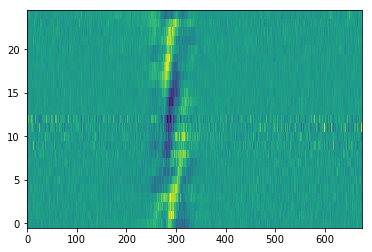

In [25]:
print(fcaII.shape)
mean_flux = np.mean(fcaII, axis=0) # axis=0 implies that mean be taken column wise. i.e. wavelength-wise
print(mean_flux.shape)

# note that the sizes of 'fcaII' and 'mean_flux' are different. 
# So, we add a dimension to the mean_flux and make it match the fcaII's shape

mean_flux_new_axis=mean_flux[np.newaxis,:]
print(mean_flux_new_axis.shape)

# plot the flux - mean as plot
fdiff = fcaII - mean_flux_new_axis
print(fdiff.shape)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
im = ax.imshow(fdiff, aspect = "auto", origin = 'lower')
plt.show()
fig.savefig('CaII-1.png')

**Conclusion:**
We can already see features moving through the line. However, the axis scales are not right, the gap between both nights is not visible and there is no proper labeling. So, next, we will introduce gaps between the two nights of observations.

[array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False, False, False, False, False], dtype=bool), array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True], dtype=bool)]


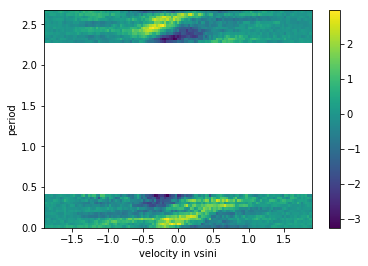

In [26]:
# delta_p, was calculated in 'constants' section.
# it is the overall observational period, measured as per star's period.
ind1 = delta_p < 1 * u.dimensionless_unscaled 
ind2 = ~ind1
#print(ind1)
#print(ind2)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

print([ind1, ind2])

# this for loop executes two times. once when delta_p<1 (ind1=true), and the next time when delta_p>=1(ind2=true).
# this split is to show the time variation of the flux. 
# note: x axis: vsini, yaxis: period: starting from first observation at bottom and going upwards.
for ind in [ind1, ind2]:
    # note: syntax for extent: extent=[horizontal_min,horizontal_max,vertical_min,vertical_max]
    
    im = ax.imshow(fdiff[ind,:], 
                   extent = (np.min(vsini), np.max(vsini), np.min(delta_p[ind]), np.max(delta_p[ind])), 
                   aspect = "auto", origin = 'lower')
    
    # x axis: flux_difference (i.e. individual flux - mean flux)
    # yaxis: observational period: delta_p
ax.set_ylim([np.min(delta_p), np.max(delta_p)]) 
ax.set_xlim([-1.9,1.9])
ax.set_ylabel('period')
ax.set_xlabel('velocity in vsini')

fig.colorbar(im)
plt.draw()

plt.show()
fig.savefig('CaII-2.png')